# **Import Libraries**

In [2]:
import nltk
from nltk.translate import meteor_score
from datasets import load_metric
from datasets import load_dataset
import pandas as pd
import json
import matplotlib.pyplot as plt

nltk.download('wordnet')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Load Data**

In [4]:
val_df = pd.read_csv('D:\\HCMUS\\StatisticsLearning\\Project\\data\\val_candidate.csv')
val_df

,en,vi,vi_candidate
0,Try to eat whole grains over refined grains .,Bạn nên ăn ngũ cốc nguyên hạt thay cho ngũ cốc...,Bạn nên ăn ngũ cốc nguyên hạt thay vì ngũ cốc ...
1,It 's also worth noting that although the idea...,Nó sẽ không xứng đáng mặc dù ý kiến dường như ...,"Mặc dù ý tưởng này có vẻ trái với chúng ta, nh..."
2,Dampening your skin is a great way to lower yo...,Làm mát da là một cách tuyệt vời để hạ nhiệt đ...,Việc làm ẩm da là một cách tuyệt vời để hạ nhi...
3,I didn't know why I wasn't supposed to go to t...,tôi không biết tại sao tôi không nên đến một p...,tôi không biết tại sao tôi không nên đến phần ...
4,Could one have been mixed up for the other ?,Có khi nào hai câu chuyện đã bị nhầm lẫn với n...,Có ai đã hoà trộn được với người kia không?
...,...,...,...
4995,"Where I live, we have snow in January.","nơi tôi sống, chúng tôi có tuyết vào tháng một.","nơi tôi sống, chúng tôi có tuyết vào tháng một."
4996,"You can 't force people of free will , and I t...","Bạn không thể bắt ép những con người tự do , v...","Anh không thể ép người tự do, và tôi hoàn toàn..."
4997,Whoever did it didn't want us to find out abou...,bất cứ ai đã làm nó không muốn chúng tôi tìm h...,bất cứ ai làm điều đó không muốn chúng tôi tìm...
4998,It tends to be a lot more work for the celebri...,Điều này khiến người nổi tiếng phải thực hiện ...,Nó có xu hướng làm việc nhiều hơn cho người nổ...


In [19]:
test_df = pd.read_csv('D:\\HCMUS\\StatisticsLearning\\Project\\data\\test_candidate.csv')
test_df['vi_length'] = test_df['vi'].apply(lambda x: len(x.split()))

In [5]:
val_df['vi_length'] = val_df['vi'].apply(lambda x: len(x.split()))
val_df.head()

,en,vi,vi_candidate,vi_length
0,Try to eat whole grains over refined grains .,Bạn nên ăn ngũ cốc nguyên hạt thay cho ngũ cốc...,Bạn nên ăn ngũ cốc nguyên hạt thay vì ngũ cốc ...,14
1,It 's also worth noting that although the idea...,Nó sẽ không xứng đáng mặc dù ý kiến dường như ...,"Mặc dù ý tưởng này có vẻ trái với chúng ta, nh...",51
2,Dampening your skin is a great way to lower yo...,Làm mát da là một cách tuyệt vời để hạ nhiệt đ...,Việc làm ẩm da là một cách tuyệt vời để hạ nhi...,30
3,I didn't know why I wasn't supposed to go to t...,tôi không biết tại sao tôi không nên đến một p...,tôi không biết tại sao tôi không nên đến phần ...,14
4,Could one have been mixed up for the other ?,Có khi nào hai câu chuyện đã bị nhầm lẫn với n...,Có ai đã hoà trộn được với người kia không?,13


# **Evaluate**

## *1. Loss*

In [9]:
with open('D:\\HCMUS\\StatisticsLearning\\Project\\result\\loss.json', 'r') as f:
    data = json.load(f)

train_loss = data['train_loss']
val_loss = data['val_loss']

epochs = list(range(1, len(train_loss) + 1))

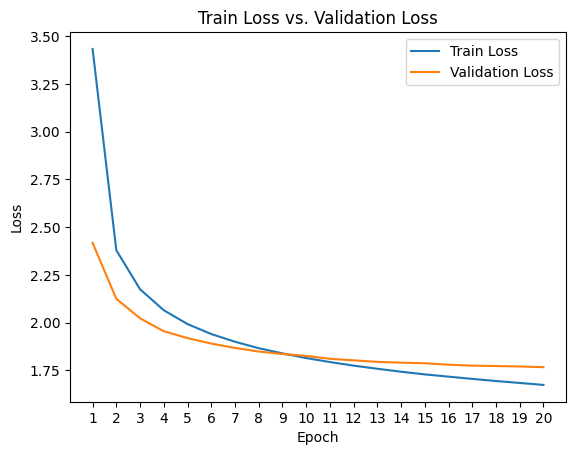

In [10]:
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Train Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

x_ticks = list(range(1, len(epochs) + 1))
plt.xticks(x_ticks) 
plt.legend()

plt.show()

## *2. Bleu Score*

In [7]:
def bleu_score(reference, candidate):
    N = min(4,len(candidate.split()))
    weights = tuple(1/N for i in range(N))
    bleu = nltk.translate.bleu_score.sentence_bleu(references=[reference.split()], hypothesis=candidate.split(), weights=weights)
    
    return bleu

In [8]:
val_df['bleu_score'] = val_df.apply(lambda row: bleu_score(row['vi'], row['vi_candidate']), axis=1)

c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [20]:
test_df['bleu_score'] = test_df.apply(lambda row: bleu_score(row['vi'], row['vi_candidate']), axis=1)

c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [9]:
val_df

,en,vi,vi_candidate,vi_length,bleu_score
0,Try to eat whole grains over refined grains .,Bạn nên ăn ngũ cốc nguyên hạt thay cho ngũ cốc...,Bạn nên ăn ngũ cốc nguyên hạt thay vì ngũ cốc ...,14,6.207107e-01
1,It 's also worth noting that although the idea...,Nó sẽ không xứng đáng mặc dù ý kiến dường như ...,"Mặc dù ý tưởng này có vẻ trái với chúng ta, nh...",51,1.207569e-01
2,Dampening your skin is a great way to lower yo...,Làm mát da là một cách tuyệt vời để hạ nhiệt đ...,Việc làm ẩm da là một cách tuyệt vời để hạ nhi...,30,3.870720e-01
3,I didn't know why I wasn't supposed to go to t...,tôi không biết tại sao tôi không nên đến một p...,tôi không biết tại sao tôi không nên đến phần ...,14,7.138958e-01
4,Could one have been mixed up for the other ?,Có khi nào hai câu chuyện đã bị nhầm lẫn với n...,Có ai đã hoà trộn được với người kia không?,13,9.988500e-232
...,...,...,...,...,...
4995,"Where I live, we have snow in January.","nơi tôi sống, chúng tôi có tuyết vào tháng một.","nơi tôi sống, chúng tôi có tuyết vào tháng một.",10,1.000000e+00
4996,"You can 't force people of free will , and I t...","Bạn không thể bắt ép những con người tự do , v...","Anh không thể ép người tự do, và tôi hoàn toàn...",20,3.525531e-01
4997,Whoever did it didn't want us to find out abou...,bất cứ ai đã làm nó không muốn chúng tôi tìm h...,bất cứ ai làm điều đó không muốn chúng tôi tìm...,14,6.298130e-01
4998,It tends to be a lot more work for the celebri...,Điều này khiến người nổi tiếng phải thực hiện ...,Nó có xu hướng làm việc nhiều hơn cho người nổ...,14,5.268189e-155


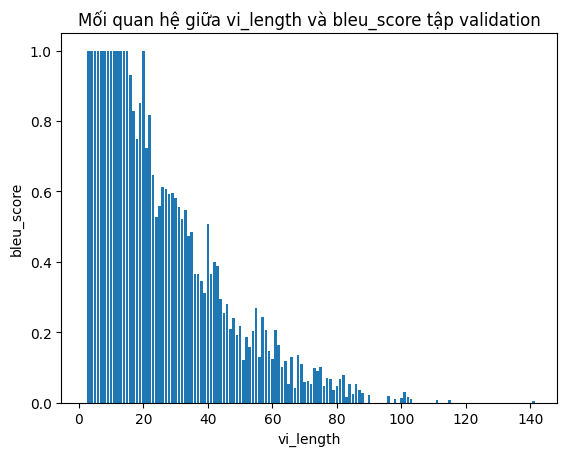

In [24]:
# Vẽ biểu đồ cột
plt.bar(val_df['vi_length'], val_df['bleu_score'])
plt.xlabel('vi_length')
plt.ylabel('bleu_score')
plt.title('Mối quan hệ giữa vi_length và bleu_score tập validation')
plt.show()

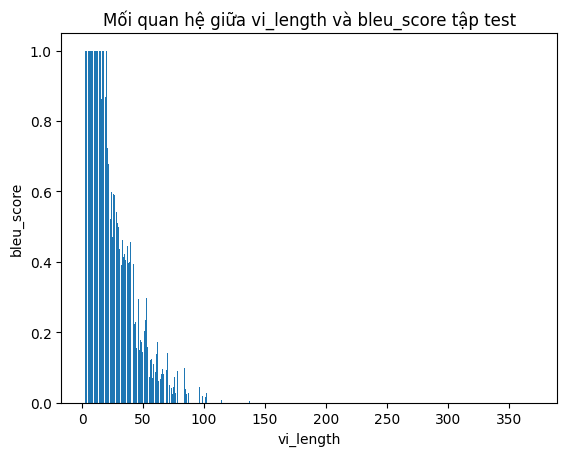

In [26]:
# Vẽ biểu đồ cột
plt.bar(test_df['vi_length'], test_df['bleu_score'])
plt.xlabel('vi_length')
plt.ylabel('bleu_score')
plt.title('Mối quan hệ giữa vi_length và bleu_score tập test')
plt.show()

## *3. METEOR Score*

In [11]:
def cal_meteor_score(reference, candidate):
    meteor = meteor_score.meteor_score([reference.split()], candidate.split())
    return meteor

In [ ]:
reference = 'The cat is on the mat'
candidate = 'Here is the cat mat'

score = cal_meteor_score(reference, candidate)
print('METEOR score:', score)

In [12]:
val_df['meteor'] = val_df.apply(lambda row: cal_meteor_score(row['vi'], row['vi_candidate']), axis=1)

In [22]:
test_df['meteor'] = test_df.apply(lambda row: cal_meteor_score(row['vi'], row['vi_candidate']), axis=1)

In [13]:
val_df

,en,vi,vi_candidate,vi_length,bleu_score,meteor
0,Try to eat whole grains over refined grains .,Bạn nên ăn ngũ cốc nguyên hạt thay cho ngũ cốc...,Bạn nên ăn ngũ cốc nguyên hạt thay vì ngũ cốc ...,14,6.207107e-01,0.788989
1,It 's also worth noting that although the idea...,Nó sẽ không xứng đáng mặc dù ý kiến dường như ...,"Mặc dù ý tưởng này có vẻ trái với chúng ta, nh...",51,1.207569e-01,0.340300
2,Dampening your skin is a great way to lower yo...,Làm mát da là một cách tuyệt vời để hạ nhiệt đ...,Việc làm ẩm da là một cách tuyệt vời để hạ nhi...,30,3.870720e-01,0.584304
3,I didn't know why I wasn't supposed to go to t...,tôi không biết tại sao tôi không nên đến một p...,tôi không biết tại sao tôi không nên đến phần ...,14,7.138958e-01,0.922866
4,Could one have been mixed up for the other ?,Có khi nào hai câu chuyện đã bị nhầm lẫn với n...,Có ai đã hoà trộn được với người kia không?,13,9.988500e-232,0.118110
...,...,...,...,...,...,...
4995,"Where I live, we have snow in January.","nơi tôi sống, chúng tôi có tuyết vào tháng một.","nơi tôi sống, chúng tôi có tuyết vào tháng một.",10,1.000000e+00,0.999500
4996,"You can 't force people of free will , and I t...","Bạn không thể bắt ép những con người tự do , v...","Anh không thể ép người tự do, và tôi hoàn toàn...",20,3.525531e-01,0.603989
4997,Whoever did it didn't want us to find out abou...,bất cứ ai đã làm nó không muốn chúng tôi tìm h...,bất cứ ai làm điều đó không muốn chúng tôi tìm...,14,6.298130e-01,0.850446
4998,It tends to be a lot more work for the celebri...,Điều này khiến người nổi tiếng phải thực hiện ...,Nó có xu hướng làm việc nhiều hơn cho người nổ...,14,5.268189e-155,0.228714


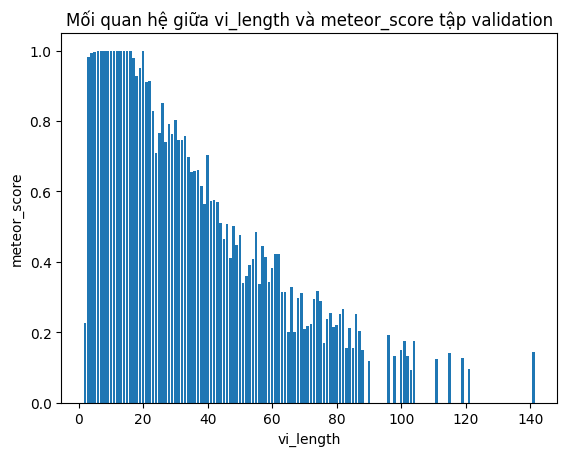

In [27]:
# Vẽ biểu đồ cột
plt.bar(val_df['vi_length'], val_df['meteor'])
plt.xlabel('vi_length')
plt.ylabel('meteor_score')
plt.title('Mối quan hệ giữa vi_length và meteor_score tập validation')
plt.show()

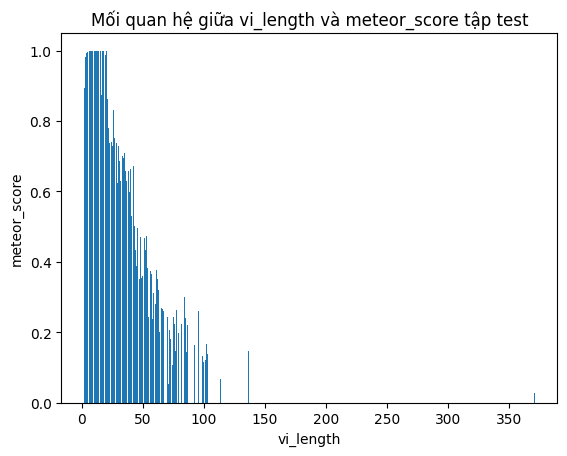

In [28]:
# Vẽ biểu đồ cột
plt.bar(test_df['vi_length'], test_df['meteor'])
plt.xlabel('vi_length')
plt.ylabel('meteor_score')
plt.title('Mối quan hệ giữa vi_length và meteor_score tập test')
plt.show()